In [1]:
!pip install tensorflow==2.8.1 tensorflow-gpu==2.8.1 opencv-python mediapipe sklearn matplotlib dill

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import dill



In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                 
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)

        # Break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

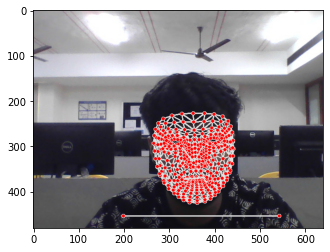

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)
    

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 0.55334044,  0.70127696, -1.61191463, ...,  0.        ,
        0.        ,  0.        ])

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 0.55334044,  0.70127696, -1.61191463, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
# Path for exported data (arrays)
DATA_PATH = os.path.join('MP_Data') 

actions = np.array(['hello', 'thanks', 'iloveyou'])

no_sequences = 30

sequence_length = 30

start_folder = 30

In [17]:
for action in actions:

    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [18]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
            
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                # keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [19]:
cap.release()
cv2.destroyAllWindows()

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
sequences, labels = [], []

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(90, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(5, 3)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [31]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [32]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [33]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 55ms/step - loss: 1.4716 - categorical_accuracy: 0.4118
Epoch 2/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.1427 - categorical_accuracy: 0.3294
Epoch 3/2000
3/3 [==============================] - 0s 50ms/step - loss: 3.5833 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 48ms/step - loss: 1.5234 - categorical_accuracy: 0.4588
Epoch 5/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.0349 - categorical_accuracy: 0.5294
Epoch 6/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.6889 - categorical_accuracy: 0.5529
Epoch 7/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.4744 - categorical_accuracy: 0.8000
Epoch 8/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.6004 - categorical_accuracy: 0.7176
Epoch 9/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.5386 - categorical_accuracy: 0.7412
E

3/3 [==============================] - 0s 104ms/step - loss: 0.0970 - categorical_accuracy: 0.9882
Epoch 146/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0996 - categorical_accuracy: 0.9765
Epoch 147/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0924 - categorical_accuracy: 0.9765
Epoch 148/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0899 - categorical_accuracy: 0.9882
Epoch 149/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0884 - categorical_accuracy: 0.9882
Epoch 150/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0868 - categorical_accuracy: 0.9882
Epoch 151/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0921 - categorical_accuracy: 0.9765
Epoch 152/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0852 - categorical_accuracy: 0.9882
Epoch 153/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0910 - categorical_accuracy: 0.98

3/3 [==============================] - 0s 60ms/step - loss: 0.0231 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0216 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0214 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0205 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0205 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0205 - categorical_accuracy: 1.0000
Epoch 295/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0205 - categorical_accuracy: 1.0000
Epoch 296/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0187 - categorical_accuracy: 1.0000
Epoch 297/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0194 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 57ms/step - loss: 0.0367 - categorical_accuracy: 0.9882
Epoch 434/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0439 - categorical_accuracy: 0.9882
Epoch 435/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0420 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0373 - categorical_accuracy: 0.9882
Epoch 437/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0325 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0371 - categorical_accuracy: 0.9882
Epoch 439/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0304 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0343 - categorical_accuracy: 1.0000
Epoch 441/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0321 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 57ms/step - loss: 0.0140 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0393 - categorical_accuracy: 0.9765
Epoch 579/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0097 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0225 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0351 - categorical_accuracy: 0.9882
Epoch 582/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0224 - categorical_accuracy: 0.9882
Epoch 583/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0199 - categorical_accuracy: 1.0000
Epoch 584/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0628 - categorical_accuracy: 0.9765
Epoch 585/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0278 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 57ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0030 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0029 - categorical_accuracy: 1.0000
Epoch 726/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0026 - categorical_accuracy: 1.0000
Epoch 727/2000
3/3 [==============================] - 0s 180ms/step - loss: 0.0028 - categorical_accuracy: 1.0000
Epoch 728/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0025 - categorical_accuracy: 1.0000
Epoch 729/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0024 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 55ms/step - loss: 9.1239e-04 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.9715e-04 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.9176e-04 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.8160e-04 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 58ms/step - loss: 8.7116e-04 - categorical_accuracy: 1.0000
Epoch 870/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.5819e-04 - categorical_accuracy: 1.0000
Epoch 871/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.5174e-04 - categorical_accuracy: 1.0000
Epoch 872/2000
3/3 [==============================] - 0s 55ms/step - loss: 8.4951e-04 - categorical_accuracy: 1.0000
Epoch 873/2000
3/3 [==============================] - 0s 58ms/step - loss: 8.23

3/3 [==============================] - 0s 56ms/step - loss: 2.5263e-04 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.5017e-04 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.5042e-04 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.4968e-04 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.4861e-04 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.4884e-04 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.4875e-04 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.4720e-04 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 54ms/step - lo

3/3 [==============================] - 0s 57ms/step - loss: 1.8770e-04 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.8938e-04 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.8685e-04 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.8895e-04 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.8629e-04 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.8606e-04 - categorical_accuracy: 1.0000
Epoch 1149/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.8583e-04 - categorical_accuracy: 1.0000
Epoch 1150/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.8599e-04 - categorical_accuracy: 1.0000
Epoch 1151/2000
3/3 [==============================] - 0s 65ms/step - lo

3/3 [==============================] - 0s 68ms/step - loss: 1.3551e-04 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.3565e-04 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.3498e-04 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.3461e-04 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.3451e-04 - categorical_accuracy: 1.0000
Epoch 1286/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.3505e-04 - categorical_accuracy: 1.0000
Epoch 1287/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.3498e-04 - categorical_accuracy: 1.0000
Epoch 1288/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.3486e-04 - categorical_accuracy: 1.0000
Epoch 1289/2000
3/3 [==============================] - 0s 62ms/step - lo

3/3 [==============================] - 0s 60ms/step - loss: 1.0913e-04 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0911e-04 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0855e-04 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0929e-04 - categorical_accuracy: 1.0000
Epoch 1423/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0876e-04 - categorical_accuracy: 1.0000
Epoch 1424/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0808e-04 - categorical_accuracy: 1.0000
Epoch 1425/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0955e-04 - categorical_accuracy: 1.0000
Epoch 1426/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0859e-04 - categorical_accuracy: 1.0000
Epoch 1427/2000
3/3 [==============================] - 0s 69ms/step - lo

3/3 [==============================] - 0s 58ms/step - loss: 8.8264e-05 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 65ms/step - loss: 8.8270e-05 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 59ms/step - loss: 8.9234e-05 - categorical_accuracy: 1.0000
Epoch 1560/2000
3/3 [==============================] - 0s 61ms/step - loss: 8.8712e-05 - categorical_accuracy: 1.0000
Epoch 1561/2000
3/3 [==============================] - 0s 59ms/step - loss: 8.8087e-05 - categorical_accuracy: 1.0000
Epoch 1562/2000
3/3 [==============================] - 0s 58ms/step - loss: 8.7875e-05 - categorical_accuracy: 1.0000
Epoch 1563/2000
3/3 [==============================] - 0s 58ms/step - loss: 8.7810e-05 - categorical_accuracy: 1.0000
Epoch 1564/2000
3/3 [==============================] - 0s 61ms/step - loss: 8.7446e-05 - categorical_accuracy: 1.0000
Epoch 1565/2000
3/3 [==============================] - 0s 60ms/step - lo

3/3 [==============================] - 0s 71ms/step - loss: 6.9401e-05 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 69ms/step - loss: 6.9479e-05 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 66ms/step - loss: 7.0037e-05 - categorical_accuracy: 1.0000
Epoch 1698/2000
3/3 [==============================] - 0s 70ms/step - loss: 6.9162e-05 - categorical_accuracy: 1.0000
Epoch 1699/2000
3/3 [==============================] - 0s 68ms/step - loss: 6.9201e-05 - categorical_accuracy: 1.0000
Epoch 1700/2000
3/3 [==============================] - 0s 63ms/step - loss: 6.8599e-05 - categorical_accuracy: 1.0000
Epoch 1701/2000
3/3 [==============================] - 0s 64ms/step - loss: 6.8575e-05 - categorical_accuracy: 1.0000
Epoch 1702/2000
3/3 [==============================] - 0s 204ms/step - loss: 6.8969e-05 - categorical_accuracy: 1.0000
Epoch 1703/2000
3/3 [==============================] - 0s 64ms/step - l

3/3 [==============================] - 0s 53ms/step - loss: 5.4607e-05 - categorical_accuracy: 1.0000
Epoch 1834/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.4679e-05 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 52ms/step - loss: 5.4643e-05 - categorical_accuracy: 1.0000
Epoch 1836/2000
3/3 [==============================] - 0s 53ms/step - loss: 5.4632e-05 - categorical_accuracy: 1.0000
Epoch 1837/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.4401e-05 - categorical_accuracy: 1.0000
Epoch 1838/2000
3/3 [==============================] - 0s 54ms/step - loss: 5.5136e-05 - categorical_accuracy: 1.0000
Epoch 1839/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.4215e-05 - categorical_accuracy: 1.0000
Epoch 1840/2000
3/3 [==============================] - 0s 56ms/step - loss: 5.4290e-05 - categorical_accuracy: 1.0000
Epoch 1841/2000
3/3 [==============================] - 0s 56ms/step - lo

3/3 [==============================] - 0s 56ms/step - loss: 4.6280e-05 - categorical_accuracy: 1.0000
Epoch 1972/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.6179e-05 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.6161e-05 - categorical_accuracy: 1.0000
Epoch 1974/2000
3/3 [==============================] - 0s 55ms/step - loss: 4.6010e-05 - categorical_accuracy: 1.0000
Epoch 1975/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.6056e-05 - categorical_accuracy: 1.0000
Epoch 1976/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.6025e-05 - categorical_accuracy: 1.0000
Epoch 1977/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.5771e-05 - categorical_accuracy: 1.0000
Epoch 1978/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.6004e-05 - categorical_accuracy: 1.0000
Epoch 1979/2000
3/3 [==============================] - 0s 59ms/step - lo

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [34]:
res = model.predict(X_test)

In [35]:
actions[np.argmax(res[4])]

'iloveyou'

In [36]:
actions[np.argmax(y_test[4])]

'hello'

In [45]:
model.save('action.h5')

In [37]:
model.load_weights('action.h5')

In [38]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [39]:
yhat = model.predict(X_test)

In [40]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [41]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 4],
        [0, 1]],

       [[2, 0],
        [3, 0]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [42]:
accuracy_score(ytrue, yhat)

0.2

In [43]:
from scipy import stats

In [44]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

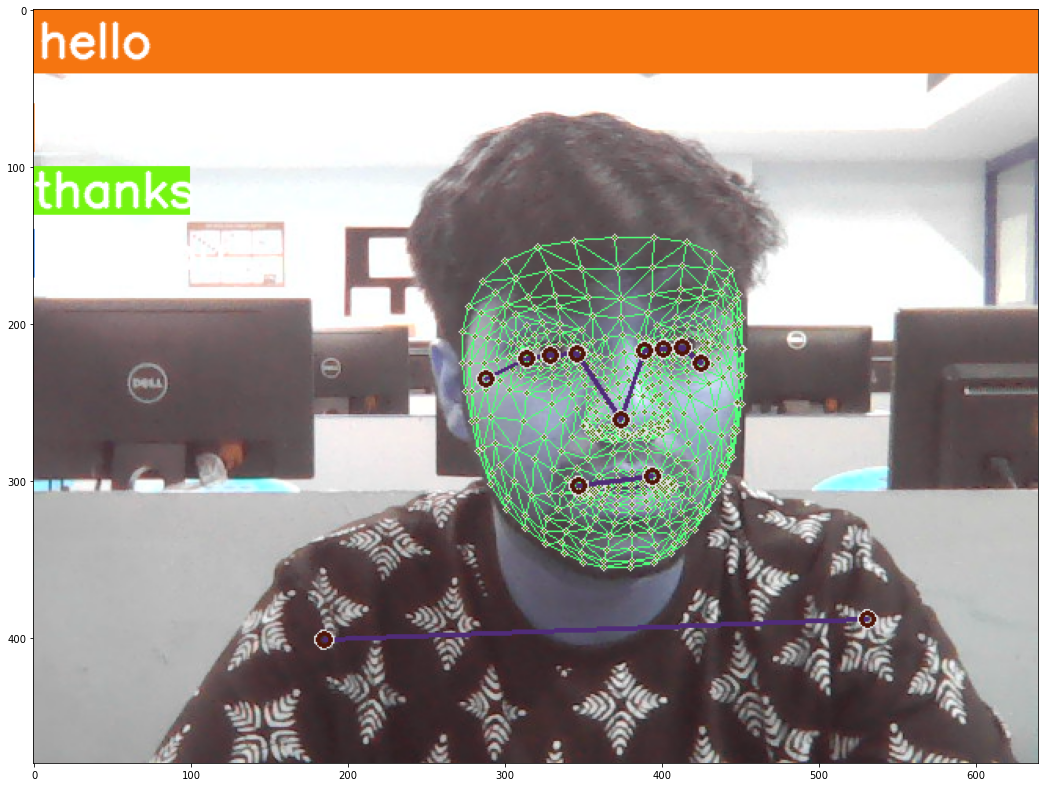

In [47]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [54]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solu